## Exploratory Data Analysis

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option("display.max_rows",None)

In [6]:
df= pd.read_csv('salary_data_cleaned.csv')
df.head(5)

Job Title              Salary Estimate  \
0             Data Scientist   $53K-$91K (Glassdoor est.)   
1  Healthcare Data Scientist  $63K-$112K (Glassdoor est.)   
2             Data Scientist   $80K-$90K (Glassdoor est.)   
3             Data Scientist   $56K-$97K (Glassdoor est.)   
4             Data Scientist  $86K-$143K (Glassdoor est.)   

                                     Job Description  Rating  \
0  Data Scientist\r\nLocation: Albuquerque, NM\r\...     3.8   
1  What You Will Do:\r\n\r\nI. General Summary\r\...     3.4   
2  KnowBe4, Inc. is a high growth information sec...     4.8   
3  *Organization and Job ID**\r\nJob ID: 310709\r...     3.8   
4  Data Scientist\r\nAffinity Solutions / Marketi...     2.9   

                              Company Name         Location    Headquarters  \
0                      Tecolote Research\r  Albuquerque, NM      Goleta, CA   
1  University of Maryland Medical System\r    Linthicum, MD   Baltimore, MD   
2                                KnowBe4\r   Clearwater, FL  Clearwater, FL   
3                                   PNNL\r     Richland, WA    Richland, WA   
4                     Affinity Solutions\r     New York, NY    New York, NY   

                     Size  Founded   Type of ownership  ... age python_reqd  \
0   501 to 1000 employees     1973   Company - Private  ...  47           1   
1        10000+ employees     1984  Other Organization  ...  36           1   
2   501 to 1000 employees     2010   Company - Private  ...  10           1   
3  1001 to 5000 employees     1965          Government  ...  55           1   
4     51 to 200 employees     1998   Company - Private  ...  22           1   

  spark_reqd aws_reqd  excel_reqd        job_simp  seniority desc_len  \
0          0        0           1  data scientist         na     2555   
1          0        0           0  data scientist         na     4828   
2          1        0           1  data scientist         na     3495   
3          0        0           0  data scientist         na     3926   
4          0        0           1  data scientist         na     2748   

   num_comp                            Comapy Name  
0         0                      Tecolote Research  
1         0  University of Maryland Medical System  
2         0                                KnowBe4  
3         3                                   PNNL  
4         3                     Affinity Solutions  

[5 rows x 29 columns]

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 718 entries, 0 to 717
Data columns (total 29 columns):
Job Title            718 non-null object
Salary Estimate      718 non-null object
Job Description      718 non-null object
Rating               718 non-null float64
Company Name         718 non-null object
Location             718 non-null object
Headquarters         718 non-null object
Size                 718 non-null object
Founded              718 non-null int64
Type of ownership    718 non-null object
Industry             718 non-null object
Sector               718 non-null object
Revenue              718 non-null object
Competitors          718 non-null object
min sal              718 non-null int64
max sal              718 non-null int64
avg                  718 non-null float64
State                718 non-null object
same state           718 non-null int64
age                  718 non-null int64
python_reqd          718 non-null int64
spark_reqd           718 non-null int6

In [3]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'min sal', 'max sal', 'avg', 'State', 'same state', 'age',
       'python_reqd', 'spark_reqd', 'aws_reqd', 'excel_reqd', 'job_simp',
       'seniority', 'desc_len', 'num_comp', 'Comapy Name'],
      dtype='object')

In [9]:
df.describe()

Rating      Founded     min sal     max sal         avg  \
count  718.000000   718.000000  718.000000  718.000000  718.000000   
mean     3.621727  1832.675487   75.871866  130.435933  103.153900   
std      0.811907   504.796154   30.795728   44.101293   36.898694   
min     -1.000000    -1.000000   15.000000   16.000000   15.500000   
25%      3.300000  1939.000000   54.000000   98.250000   76.500000   
50%      3.700000  1989.000000   71.000000  126.000000   98.500000   
75%      4.000000  2007.000000   92.750000  157.000000  124.000000   
max      5.000000  2019.000000  202.000000  306.000000  254.000000   

       same state         age  python_reqd  spark_reqd    aws_reqd  \
count  718.000000  718.000000   718.000000  718.000000  718.000000   
mean     0.564067   46.516713     0.545961    0.232591    0.243733   
std      0.496224   54.436165     0.498230    0.422778    0.429633   
min      0.000000   -1.000000     0.000000    0.000000    0.000000   
25%      0.000000   10.000000     0.000000    0.000000    0.000000   
50%      1.000000   24.000000     1.000000    0.000000    0.000000   
75%      1.000000   59.000000     1.000000    0.000000    0.000000   
max      1.000000  276.000000     1.000000    1.000000    1.000000   

       excel_reqd      desc_len    num_comp  
count  718.000000    718.000000  718.000000  
mean     0.532033   3930.667131    1.083565  
std      0.499321   1521.903590    1.393843  
min      0.000000    407.000000    0.000000  
25%      0.000000   2869.000000    0.000000  
50%      1.000000   3793.000000    0.000000  
75%      1.000000   4784.750000    3.000000  
max      1.000000  10146.000000    4.000000

### Some Histograms:

In [22]:
#Pandas support many inbuilt graphs
print(f'Mean is: {df["Rating"].mean()}')
df.Rating.hist()

Mean is: 3.6217270194986106


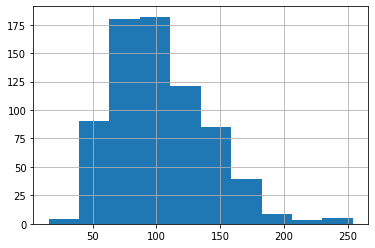

In [23]:
df['avg'].hist()

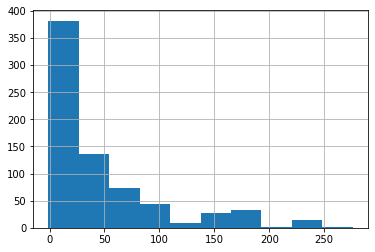

In [25]:
#Age of company is not normally distributed and we will have to NORMALIZE it if we want to use it in our data
df['age'].hist()